In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

import my_k_means

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    #print(rng, i, centers)
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        print(labels)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        print(new_centers)
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        #yield centers, labels
    
    return centers, labels


ModuleNotFoundError: No module named 'my_k_means'

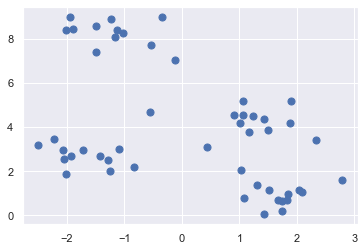

In [5]:
X, y_true = make_blobs(
    n_samples=50,
    centers=4,
    cluster_std=0.60,
    random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

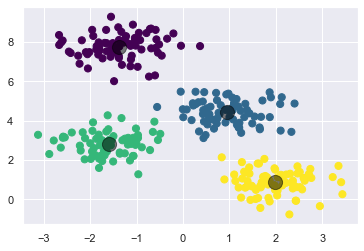

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y_kmeans,
    s=50,
    cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    s=200,
    alpha=0.5);


In [4]:
centers, labels = find_clusters(X, 4)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    s=50,
    cmap='viridis');


[3 1 0 1 3 2 3 2 1 1 3 1 2 1 3 2 2 3 3 3 2 3 0 3 3 2 3 2 3 2 1 1 2 1 1 1 1
 1 3 3 2 3 0 2 3 3 1 3 1 3 3 3 1 3 2 3 1 3 1 3 1 2 1 3 3 3 1 3 1 3 2 3 1 3
 3 1 3 2 3 1 3 2 3 3 1 0 3 0 1 1 2 3 1 3 3 2 3 2 0 3 1 3 1 3 2 3 3 0 1 0 3
 3 3 1 3 2 1 3 3 0 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 3 1 1 3 2 3 0 3 1 2
 1 1 1 2 0 2 3 3 1 3 3 0 1 2 2 3 2 3 3 2 3 2 2 1 3 0 3 1 2 3 2 3 3 2 3 3 2
 2 0 2 2 1 3 3 2 2 3 3 3 2 3 1 2 3 3 3 2 1 3 1 2 1 2 3 2 0 1 3 3 3 3 2 1 3
 3 3 3 3 3 1 1 0 2 1 2 3 3 2 3 3 1 3 2 2 2 1 1 1 1 3 3 0 0 3 3 2 3 3 3 3 3
 1 2 2 3 3 1 3 2 1 0 3 3 3 3 2 2 3 3 0 1 1 2 2 2 3 3 2 1 3 1 2 3 3 1 1 1 3
 2 2 1 3]
[3 1 0 1 3 3 3 2 1 1 3 1 0 1 3 2 0 3 3 3 2 3 0 3 3 0 3 0 3 2 1 1 2 1 1 1 1
 1 3 3 2 3 0 2 3 3 1 3 1 3 3 3 1 3 2 3 1 3 1 3 1 2 1 3 3 3 1 3 1 3 2 3 1 3
 3 1 3 0 3 1 3 2 3 3 1 0 3 0 1 1 2 3 1 3 3 2 3 3 0 3 1 3 1 3 0 3 3 0 1 0 3
 3 3 1 3 2 1 3 3 0 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 2 1 1 3 2 0 0 3 1 2
 1 1 1 0 1 0 3 3 1 3 3 0 1 2 2 3 0 3 3 0 3 2 2 1 3 0 3 1 2 3 2 3 3 2 3 3 0
 2 0 2 3 1 2 3 

ValueError: too many values to unpack (expected 2)

In [7]:
for centers, labels in find_clusters(X, 4):
    print('x')
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    s=50,
    cmap='viridis');

[3 1 0 1 3 2 3 2 1 1 3 1 2 1 3 2 2 3 3 3 2 3 0 3 3 2 3 2 3 2 1 1 2 1 1 1 1
 1 3 3 2 3 0 2 3 3 1 3 1 3 3 3 1 3 2 3 1 3 1 3 1 2 1 3 3 3 1 3 1 3 2 3 1 3
 3 1 3 2 3 1 3 2 3 3 1 0 3 0 1 1 2 3 1 3 3 2 3 2 0 3 1 3 1 3 2 3 3 0 1 0 3
 3 3 1 3 2 1 3 3 0 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 3 1 1 3 2 3 0 3 1 2
 1 1 1 2 0 2 3 3 1 3 3 0 1 2 2 3 2 3 3 2 3 2 2 1 3 0 3 1 2 3 2 3 3 2 3 3 2
 2 0 2 2 1 3 3 2 2 3 3 3 2 3 1 2 3 3 3 2 1 3 1 2 1 2 3 2 0 1 3 3 3 3 2 1 3
 3 3 3 3 3 1 1 0 2 1 2 3 3 2 3 3 1 3 2 2 2 1 1 1 1 3 3 0 0 3 3 2 3 3 3 3 3
 1 2 2 3 3 1 3 2 1 0 3 3 3 3 2 2 3 3 0 1 1 2 2 2 3 3 2 1 3 1 2 3 3 1 1 1 3
 2 2 1 3]
[[ 0.996244    5.28262763]
 [-1.39262004  7.7943098 ]
 [ 1.26533912  3.65658566]
 [-0.03528305  1.93369899]]
[3 1 0 1 3 3 3 2 1 1 3 1 0 1 3 2 0 3 3 3 2 3 0 3 3 0 3 0 3 2 1 1 2 1 1 1 1
 1 3 3 2 3 0 2 3 3 1 3 1 3 3 3 1 3 2 3 1 3 1 3 1 2 1 3 3 3 1 3 1 3 2 3 1 3
 3 1 3 0 3 1 3 2 3 3 1 0 3 0 1 1 2 3 1 3 3 2 3 3 0 3 1 3 1 3 0 3 3 0 1 0 3
 3 3 1 3 2 1 3 3 0 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 2

ValueError: too many values to unpack (expected 2)